In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from tube import *

In [2]:
l1 = pt(-2,0)
l2 = pt(2,-1)
l3 = pt(3,1)
ls = np.array([l1,l2,l3])
rs = np.array([0.5,0.5,0.5])
Y = NLets(ls,rs,corner_size=1)

# geometry

In [3]:
Y.build_geometry(n_jobs=6)
Y.n_pts

4928

# solver

In [4]:
Y.build_A()

In [5]:
flow = Y.flows[0]
inflow, outflow = flow
U = Y.get_bounadry_velocity_condition(0)

In [6]:
omega = Y.compute_omega(U)

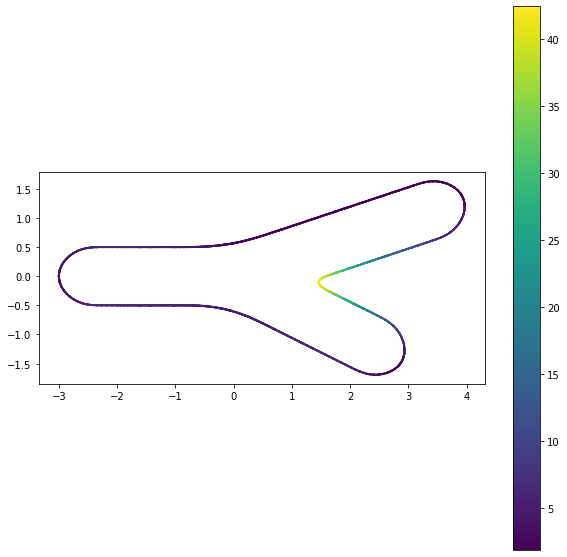

In [7]:
fig,ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(Y.x,Y.y,c = np.abs(omega),s=1))
ax.set_aspect('equal')

In [8]:
U = Y.get_bounadry_velocity_condition(1)

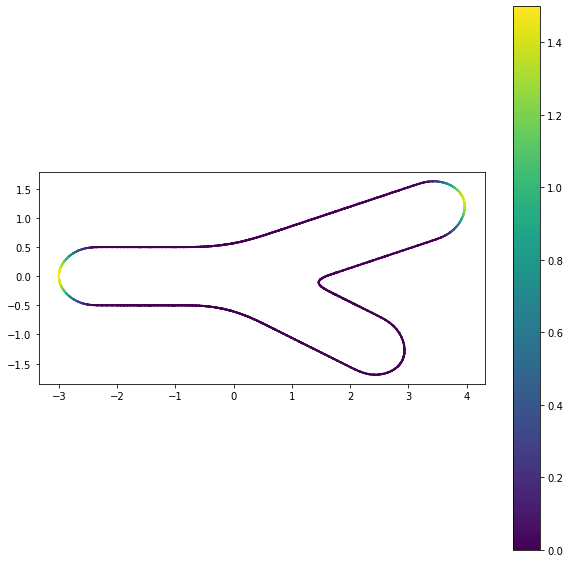

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(Y.x,Y.y,c = U[:,0],s=1))
ax.set_aspect('equal')

In [10]:
boundary = Y.boundary
left,right,bottom,top = Y.extent

In [11]:
nx = np.ceil((right - left)*100).astype(int)
ny = np.ceil((top - bottom)*100).astype(int)
xs = np.linspace(left,right,nx)
ys = np.linspace(bottom,top,ny)
xs,ys = np.meshgrid(xs,ys)
shape = xs.shape
xs = xs
ys = ys
mask = Path(boundary).contains_points(np.column_stack((xs.flatten(),ys.flatten()))).reshape(shape)

In [12]:
u,v = Y.velocity(xs[mask],ys[mask],omega).T

In [13]:
np.column_stack((xs[mask],ys[mask]))

array([[ 1.76592392, -1.43720827],
       [ 1.77593968, -1.43720827],
       [ 1.74589241, -1.42720294],
       ...,
       [ 2.81757821,  1.46433632],
       [ 2.82759396,  1.46433632],
       [ 2.83760972,  1.46433632]])

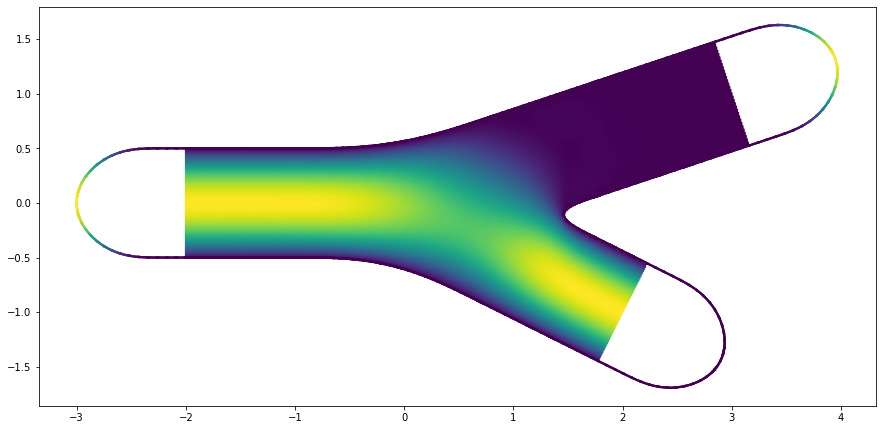

In [14]:
fig,ax = plt.subplots(figsize=(15,10))
vmax = np.max(np.linalg.norm(U,axis=1))
vmin = 0
ax.scatter(xs[mask],ys[mask], c = np.sqrt(u**2 + v**2), s=1,vmin=vmin,vmax=vmax)
ax.scatter(Y.x,Y.y,c = np.linalg.norm(U,axis=1),s=2,vmin=vmin,vmax=vmax)
ax.set_aspect('equal')

In [25]:
u_max_mask = np.abs(u) > np.max(U[:,0])
u_filtered = u.copy()
u_filtered[u_max_mask] = 0

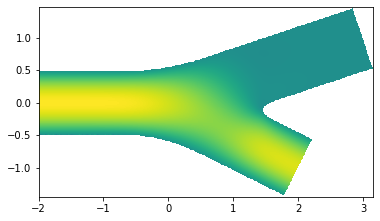

In [27]:
image = np.zeros_like(xs)
image[mask] = u_filtered
image = np.ma.masked_where(mask == False,image)
plt.imshow(image,origin='lower',extent=Y.extent)

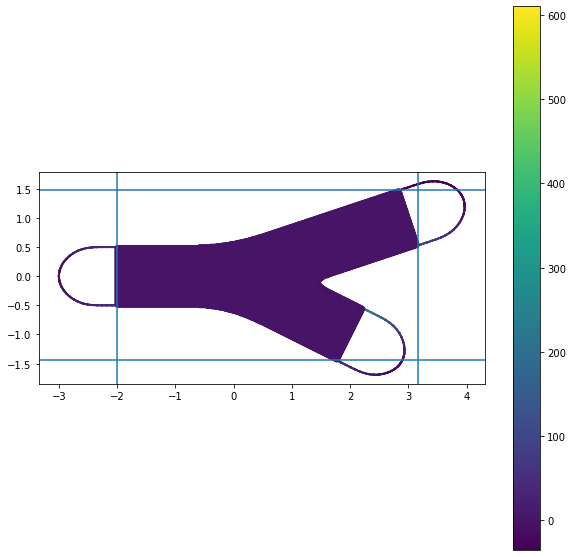

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(Y.x,Y.y,s=1,c=np.abs(omega))

# ax.scatter(boundary[:,0],boundary[:,1],c=np.arange(len(boundary)))

fig.colorbar(ax.scatter(xs[mask],ys[mask],s=15,c=v))

ax.axhline(bottom)
ax.axhline(top)
ax.axvline(left)
ax.axvline(right)

ax.set_aspect(1)


----

In [32]:
Y.build_all_boundary_velocity_conditions()
Y.build_omegas(n_jobs=2)
Y.build_pressure_drops()

In [33]:
Y.pressure_drops

array([[10.54330498,  6.41469744],
       [ 6.41463857, 13.31876575]])